In [143]:
# Import Dependencies
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import numpy as np
import seaborn
import random
import datetime
import time
import json
import os

from marvel_keys import apikey, privateKey, marvel_char_list

In [144]:
csv_path = os.path.join('marvel_data.csv')

marvel_df = pd.read_csv(csv_path)

In [145]:
marvel_df['name'][:2500].head()

0         Spider-Man 
1    Captain America 
2          Wolverine 
3           Iron Man 
4               Thor 
Name: name, dtype: object

In [146]:
loop_test = ['Iron Man', 'Captain America', 'Thor', 'Black Widow', 'Hulk']

## API Request and Data Retrieval

In [148]:
import hashlib
import urllib.parse
import urllib.request

In [149]:
ts = str(round(time.time()))

hsh = hashlib.md5(bytes(ts+privateKey+apikey, 'utf-8')).hexdigest()

In [182]:
url = 'https://gateway.marvel.com:443/v1/public/characters'

#Initialize python dict containing data

marvel_data = []


for hero in marvel_char_list:
    
    search_data = {'id':[],
                'name':[],
               'description':[],
                'comics_avail':[],
                'comics_list':[],
                'series_avail':[],
                'series_list':[],
                'events_avail':[],
                'events_list':[]}
    
    #Set parameters for search
    params = {'ts': ts,
            'apikey': apikey,
              'hash': hsh,
             'name': hero,
             'limit': '100'}
    
    #Set up response request
    response = req.get(url, params=params).json()
    
    try:

        #Extract data initial data
        hero_data = response['data']['results'][0]
        search_data['id'].append(hero_data['id'])
        search_data['name'].append(hero_data['name'])
        search_data['description'].append(hero_data['description'])
        search_data['comics_avail'].append(hero_data['comics']['available'])
        search_data['series_avail'].append(hero_data['series']['available'])
        search_data['events_avail'].append(hero_data['events']['available'])

        #Set length of comics, series, and events to iterate over
        comics_length = len(hero_data['comics']['items'])
        series_length = len(hero_data['series']['items'])
        events_length = len(hero_data['events']['items'])

        #Iterate through items of comics, series and events to obtain names
        for n in range(comics_length):
            comics_list = hero_data['comics']['items'][n]
            search_data['comics_list'].append(comics_list['name'])

        for n in range(series_length):
            series_list = hero_data['series']['items'][n]
            search_data['series_list'].append(series_list['name'])

        for n in range(events_length):
            events_list = hero_data['series']['items'][n]
            search_data['events_list'].append(events_list['name'])
            
        marvel_data.append(search_data.copy())
        
    except IndexError:
        print('Missing or Invalid')
        print(f'Having Error with {hero}')

Missing or Invalid
Having Error with A-Bomb
Missing or Invalid
Having Error with Abomination
Missing or Invalid
Having Error with Aegis
Missing or Invalid
Having Error with Agent X
Missing or Invalid
Having Error with Air-Walker
Missing or Invalid
Having Error with American Eagle
Missing or Invalid
Having Error with Amphibian
Missing or Invalid
Having Error with Angel
Missing or Invalid
Having Error with Angela
Missing or Invalid
Having Error with Ant-Man
Missing or Invalid
Having Error with Araٌa
Missing or Invalid
Having Error with Armor
Missing or Invalid
Having Error with Atlas
Missing or Invalid
Having Error with Azazel
Missing or Invalid
Having Error with Baron Zemo
Missing or Invalid
Having Error with Beetle
Missing or Invalid
Having Error with Bengal
Missing or Invalid
Having Error with Black Knight
Missing or Invalid
Having Error with Black Widow/Natasha Romanoff
Missing or Invalid
Having Error with Bride of Nine Spiders
Missing or Invalid
Having Error with Brotherhood of Muta

In [183]:
len(marvel_data)

1121

In [259]:
marvel_df = pd.DataFrame.from_dict(marvel_data)

In [260]:
#Removing Brackets

marvel_df['comics_avail'] = marvel_df['comics_avail'].str.get(0)
# marvel_df['comics_list'] = marvel_df['comics_list'].str.get(0)
marvel_df['description'] = marvel_df['description'].str.get(0)
marvel_df['events_avail'] = marvel_df['events_avail'].str.get(0)
# marvel_df['events_list'] = marvel_df['events_list'].str.get(0)
marvel_df['id'] = marvel_df['id'].str.get(0)
marvel_df['name'] = marvel_df['name'].str.get(0)
marvel_df['series_avail'] = marvel_df['series_avail'].str.get(0)
# marvel_df['series_list'] = marvel_df['series_list'].str.get(0)

In [261]:
marvel_df.iloc[0]['comics_list']

['Avengers: The Initiative (2007) #14',
 'Avengers: The Initiative (2007) #14 (SPOTLIGHT VARIANT)',
 'Avengers: The Initiative (2007) #15',
 'Avengers: The Initiative (2007) #16',
 'Avengers: The Initiative (2007) #17',
 'Avengers: The Initiative (2007) #18',
 'Avengers: The Initiative (2007) #18 (ZOMBIE VARIANT)',
 'Avengers: The Initiative (2007) #19',
 'Deadpool (1997) #44',
 'Marvel Premiere (1972) #35',
 'Marvel Premiere (1972) #36',
 'Marvel Premiere (1972) #37']

In [262]:
marvel_clean_df = marvel_df.loc[marvel_df['events_avail'] != 0]

In [263]:
marvel_clean_df

,comics_avail,comics_list,description,events_avail,events_list,id,name,series_avail,series_list
0,12,"[Avengers: The Initiative (2007) #14, Avengers...",,1,[Avengers: The Initiative (2007 - 2010)],1011334,3-D Man,3,"[Avengers: The Initiative (2007 - 2010), Deadp..."
3,66,"[A+X (2012) #8, Avengers (1963) #183, Avengers...",,4,"[A+X (2012 - Present), Avengers (1963 - 1996),...",1009148,Absorbing Man,39,"[A+X (2012 - Present), Avengers (1963 - 1996),..."
4,8,"[Uncanny X-Men (1963) #402, Uncanny X-Men (196...",,1,[Uncanny X-Men (1963 - 2011)],1009149,Abyss,3,"[Uncanny X-Men (1963 - 2011), X-Men: Alpha (19..."
6,135,[All-New Guardians of the Galaxy Vol. 3: Infin...,Adam Warlock is an artificially created human ...,9,[All-New Guardians of the Galaxy Vol. 3: Infin...,1010354,Adam Warlock,64,[All-New Guardians of the Galaxy Vol. 3: Infin...
9,32,"[Agents of Atlas (2009) #1, Agents of Atlas (2...",,1,[Agents of Atlas (2006 - 2007)],1011198,Agents of Atlas,5,"[Agents of Atlas (2006 - 2007), Agents of Atla..."
22,33,"[Fantastic Four (1961) #163, Fantastic Four (1...",,1,[Fantastic Four (1961 - 1998)],1009435,Alicia Masters,10,"[Fantastic Four (1961 - 1998), Fantastic Four ..."
23,193,"[Alpha Flight (2011) #0.1, Alpha Flight (1983)...",,5,"[Alpha Flight (2004 - 2005), Alpha Flight (201...",1010370,Alpha Flight,31,"[Alpha Flight (2004 - 2005), Alpha Flight (201..."
25,88,"[Avengers (2016) #674, Champions (2016) #1, Ch...",,4,"[Avengers (2016 - Present), Champions (2016 - ...",1011227,Amadeus Cho,25,"[Avengers (2016 - Present), Champions (2016 - ..."
28,12,"[Elektra (1996) #15, Uncanny X-Men (1963) #181...",,1,[Elektra (1996 - 1998)],1009151,Amiko,3,"[Elektra (1996 - 1998), Uncanny X-Men (1963 - ..."
31,25,[Doctor Strange and the Sorcerers Supreme Vol....,,3,[Doctor Strange and the Sorcerers Supreme Vol....,1009152,Ancient One,8,[Doctor Strange and the Sorcerers Supreme Vol....


In [276]:
marvel_clean_df['comics_list'] = marvel_clean_df['comics_list'].map(lambda x: str(x))

/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [278]:
marvel_clean_df['comics_list'] = marvel_clean_df['comics_list'].map(lambda x: x.strip('[]'))

/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [306]:
marvel_clean_df['comics_list'] = marvel_clean_df['comics_list'].map(lambda x: x.strip("''"))

/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [307]:
marvel_clean_df.head()

,comics_avail,comics_list,description,events_avail,events_list,id,name,series_avail,series_list
0,12,"Avengers: The Initiative (2007) #14', 'Avenger...",,1,[Avengers: The Initiative (2007 - 2010)],1011334,3-D Man,3,"[Avengers: The Initiative (2007 - 2010), Deadp..."
3,66,"A+X (2012) #8', 'Avengers (1963) #183', 'Aveng...",,4,"[A+X (2012 - Present), Avengers (1963 - 1996),...",1009148,Absorbing Man,39,"[A+X (2012 - Present), Avengers (1963 - 1996),..."
4,8,"Uncanny X-Men (1963) #402', 'Uncanny X-Men (19...",,1,[Uncanny X-Men (1963 - 2011)],1009149,Abyss,3,"[Uncanny X-Men (1963 - 2011), X-Men: Alpha (19..."
6,135,All-New Guardians of the Galaxy Vol. 3: Infini...,Adam Warlock is an artificially created human ...,9,[All-New Guardians of the Galaxy Vol. 3: Infin...,1010354,Adam Warlock,64,[All-New Guardians of the Galaxy Vol. 3: Infin...
9,32,"Agents of Atlas (2009) #1', 'Agents of Atlas (...",,1,[Agents of Atlas (2006 - 2007)],1011198,Agents of Atlas,5,"[Agents of Atlas (2006 - 2007), Agents of Atla..."


In [185]:
# marvel_desc = marvel_df[['name', 'description']]

In [187]:
# #Removing Brackets
# marvel_desc['name'] = marvel_desc['name'].str.get(0)
# marvel_desc['description'] = marvel_desc['description'].str.get(0)

/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Adapted from brandonrose.org

In [189]:
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
import re
import os
import codecs
from sklearn import feature_extraction

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mgarcia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [190]:
print(type(str(marvel_data[0]['description']).strip('[]')))

<class 'str'>


In [191]:
names = []
desc = []

for n in range(len(marvel_data)):
    names.append(marvel_data[n]['name'][0])
    desc.append(marvel_data[n]['description'][0])

In [192]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 252 items in vocab_frame


### Tokenizing Using PySpark and Adapation from brandonrose.org

In [308]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, StopWordsRemover

In [309]:
# create spark app and session
spark = SparkSession.builder.appName('nlp').getOrCreate()

In [310]:
marvel_spark = spark.createDataFrame(marvel_clean_df)

In [311]:
marvel_spark.show()

+------------+--------------------+--------------------+------------+--------------------+-------+---------------+------------+--------------------+
|comics_avail|         comics_list|         description|events_avail|         events_list|     id|           name|series_avail|         series_list|
+------------+--------------------+--------------------+------------+--------------------+-------+---------------+------------+--------------------+
|          12|Avengers: The Ini...|                    |           1|[Avengers: The In...|1011334|        3-D Man|           3|[Avengers: The In...|
|          66|A+X (2012) #8', '...|                    |           4|[A+X (2012 - Pres...|1009148|  Absorbing Man|          39|[A+X (2012 - Pres...|
|           8|Uncanny X-Men (19...|                    |           1|[Uncanny X-Men (1...|1009149|          Abyss|           3|[Uncanny X-Men (1...|
|         135|All-New Guardians...|Adam Warlock is a...|           9|[All-New Guardian...|1010354|   Adam 

In [312]:
tokenizer = Tokenizer(inputCol="comics_list", outputCol="words")

In [313]:
tokenized = tokenizer.transform(marvel_spark)

In [314]:
tokenized.show()

+------------+--------------------+--------------------+------------+--------------------+-------+---------------+------------+--------------------+--------------------+
|comics_avail|         comics_list|         description|events_avail|         events_list|     id|           name|series_avail|         series_list|               words|
+------------+--------------------+--------------------+------------+--------------------+-------+---------------+------------+--------------------+--------------------+
|          12|Avengers: The Ini...|                    |           1|[Avengers: The In...|1011334|        3-D Man|           3|[Avengers: The In...|[avengers:, the, ...|
|          66|A+X (2012) #8', '...|                    |           4|[A+X (2012 - Pres...|1009148|  Absorbing Man|          39|[A+X (2012 - Pres...|[a+x, (2012), #8'...|
|           8|Uncanny X-Men (19...|                    |           1|[Uncanny X-Men (1...|1009149|          Abyss|           3|[Uncanny X-Men (1...|[u

In [315]:
# instantiate remover
remover = StopWordsRemover(inputCol="words", outputCol="filtered")

In [316]:
# Transform dataframe
tokenized_filt = remover.transform(tokenized)

In [317]:
tokenized_filt.show()

+------------+--------------------+--------------------+------------+--------------------+-------+---------------+------------+--------------------+--------------------+--------------------+
|comics_avail|         comics_list|         description|events_avail|         events_list|     id|           name|series_avail|         series_list|               words|            filtered|
+------------+--------------------+--------------------+------------+--------------------+-------+---------------+------------+--------------------+--------------------+--------------------+
|          12|Avengers: The Ini...|                    |           1|[Avengers: The In...|1011334|        3-D Man|           3|[Avengers: The In...|[avengers:, the, ...|[avengers:, initi...|
|          66|A+X (2012) #8', '...|                    |           4|[A+X (2012 - Pres...|1009148|  Absorbing Man|          39|[A+X (2012 - Pres...|[a+x, (2012), #8'...|[a+x, (2012), #8'...|
|           8|Uncanny X-Men (19...|          

In [318]:
tokenized_df = tokenized_filt.toPandas()

In [319]:
spark.stop()

In [359]:
tokenized_df.head()

,comics_avail,comics_list,description,events_avail,events_list,id,name,series_avail,series_list,words,filtered
0,12,"Avengers: The Initiative (2007) #14', 'Avenger...",,1,[Avengers: The Initiative (2007 - 2010)],1011334,3-D Man,3,"[Avengers: The Initiative (2007 - 2010), Deadp...","[avengers:, the, initiative, (2007), #14',, 'a...","[avengers:, initiative, (2007), #14',, 'avenge..."
1,66,"A+X (2012) #8', 'Avengers (1963) #183', 'Aveng...",,4,"[A+X (2012 - Present), Avengers (1963 - 1996),...",1009148,Absorbing Man,39,"[A+X (2012 - Present), Avengers (1963 - 1996),...","[a+x, (2012), #8',, 'avengers, (1963), #183',,...","[a+x, (2012), #8',, 'avengers, (1963), #183',,..."
2,8,"Uncanny X-Men (1963) #402', 'Uncanny X-Men (19...",,1,[Uncanny X-Men (1963 - 2011)],1009149,Abyss,3,"[Uncanny X-Men (1963 - 2011), X-Men: Alpha (19...","[uncanny, x-men, (1963), #402',, 'uncanny, x-m...","[uncanny, x-men, (1963), #402',, 'uncanny, x-m..."
3,135,All-New Guardians of the Galaxy Vol. 3: Infini...,Adam Warlock is an artificially created human ...,9,[All-New Guardians of the Galaxy Vol. 3: Infin...,1010354,Adam Warlock,64,[All-New Guardians of the Galaxy Vol. 3: Infin...,"[all-new, guardians, of, the, galaxy, vol., 3:...","[all-new, guardians, galaxy, vol., 3:, infinit..."
4,32,"Agents of Atlas (2009) #1', 'Agents of Atlas (...",,1,[Agents of Atlas (2006 - 2007)],1011198,Agents of Atlas,5,"[Agents of Atlas (2006 - 2007), Agents of Atla...","[agents, of, atlas, (2009), #1',, 'agents, of,...","[agents, atlas, (2009), #1',, 'agents, atlas, ..."


In [345]:
#Create necessary lists for kmeans

names_list = []
all_filtered = []
all_comics = []
stemmed_words = []
comics_avail_list = []
events_avail_list = []
series_avail_list = []

for n in range(len(tokenized_df)):
    names_list.append(tokenized_df.iloc[n]['name'])
    all_filtered.extend(tokenized_df.iloc[n]['filtered'])
    all_comics.append(tokenized_df.iloc[n]['comics_list'])
    stemmed_words.extend(tokenized_df.iloc[n]['words'])
    comics_avail_list.append(tokenized_df.iloc[n]['comics_avail'])
    events_avail_list.append(tokenized_df.iloc[n]['events_avail'])
    series_avail_list.append(tokenized_df.iloc[n]['series_avail'])

In [330]:
len(all_comics)==len(names_list)

True

In [323]:
all_comics

["Avengers: The Initiative (2007) #14', 'Avengers: The Initiative (2007) #14 (SPOTLIGHT VARIANT)', 'Avengers: The Initiative (2007) #15', 'Avengers: The Initiative (2007) #16', 'Avengers: The Initiative (2007) #17', 'Avengers: The Initiative (2007) #18', 'Avengers: The Initiative (2007) #18 (ZOMBIE VARIANT)', 'Avengers: The Initiative (2007) #19', 'Deadpool (1997) #44', 'Marvel Premiere (1972) #35', 'Marvel Premiere (1972) #36', 'Marvel Premiere (1972) #37",
 "A+X (2012) #8', 'Avengers (1963) #183', 'Avengers (1963) #184', 'Avengers (1963) #270', 'Avengers Academy (2010) #16', 'Avengers Academy (2010) #17', 'Avengers Academy (2010) #18', 'Avengers Academy (2010) #19', 'Avengers Annual (1967) #20', 'Black Bolt (2017) #3', 'Black Bolt (2017) #4', 'Black Bolt (2017) #11', 'Black Bolt Vol. 1: Hard Time (Trade Paperback)', 'Captain America (1998) #24', 'Dazzler (1981) #18', 'Dazzler (1981) #19', 'Deadpool (1997) #43', 'Fear Itself (2010) #2 (3rd Printing Variant)', 'Fear Itself: Fellowship 

In [324]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(all_comics) #fit the vectorizer to descriptions

print(tfidf_matrix.shape)

(500, 15)


In [325]:
terms = tfidf_vectorizer.get_feature_names()

In [326]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print
print

<function print>

In [348]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 177 ms, sys: 2.01 ms, total: 179 ms
Wall time: 177 ms


In [349]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [355]:
heroes = {'heroes': names_list, 'comics_available': comics_avail_list,
          'events_available': events_avail_list, 'series_available': series_avail_list,
          'comics_list': all_comics, 'cluster': clusters,}

frame = pd.DataFrame(heroes, index = [clusters] , columns = ['heroes', 'comics_list', 
                                                             'comics_available', 'events_available',
                                                             'series_available','cluster'])

In [357]:
frame.head()

,heroes,comics_list,comics_available,events_available,series_available,cluster
3,3-D Man,"Avengers: The Initiative (2007) #14', 'Avenger...",12,1,3,3
3,Absorbing Man,"A+X (2012) #8', 'Avengers (1963) #183', 'Aveng...",66,4,39,3
1,Abyss,"Uncanny X-Men (1963) #402', 'Uncanny X-Men (19...",8,1,3,1
2,Adam Warlock,All-New Guardians of the Galaxy Vol. 3: Infini...,135,9,64,2
0,Agents of Atlas,"Agents of Atlas (2009) #1', 'Agents of Atlas (...",32,1,5,0


In [351]:
frame['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

1    112
3    107
0    102
2     94
4     85
Name: cluster, dtype: int64

In [ ]:
# grouped = frame['rank'].groupby(frame['cluster']) #groupby cluster for aggregation purposes

# grouped.mean() #average rank (1 to 100) per cluster

In [ ]:
# vocab_frame = pd.DataFrame({'words': all_filtered}, index = stemmed_words)
# print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

In [ ]:
# from __future__ import print_function

# print("Top terms per cluster:")
# print()
# #sort cluster centers by proximity to centroid
# order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

# for i in range(num_clusters):
#     print("Cluster %d words:" % i, end='')
    
#     for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
#         print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
#     print() #add whitespace
#     print() #add whitespace
    
#     print("Cluster %d titles:" % i, end='')
#     for title in frame.ix[i]['title'].values.tolist():
#         print(' %s,' % title, end='')
#     print() #add whitespace
#     print() #add whitespace
    
# print()
# print()

In [352]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [353]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#FCB230', 4:'#30BBFC'}

#set up cluster names using a dict
cluster_names = {0: 'One', 
                 1: 'Two', 
                 2: 'Three',
                3: 'Four',
                4: 'Five'}

/Users/mgarcia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


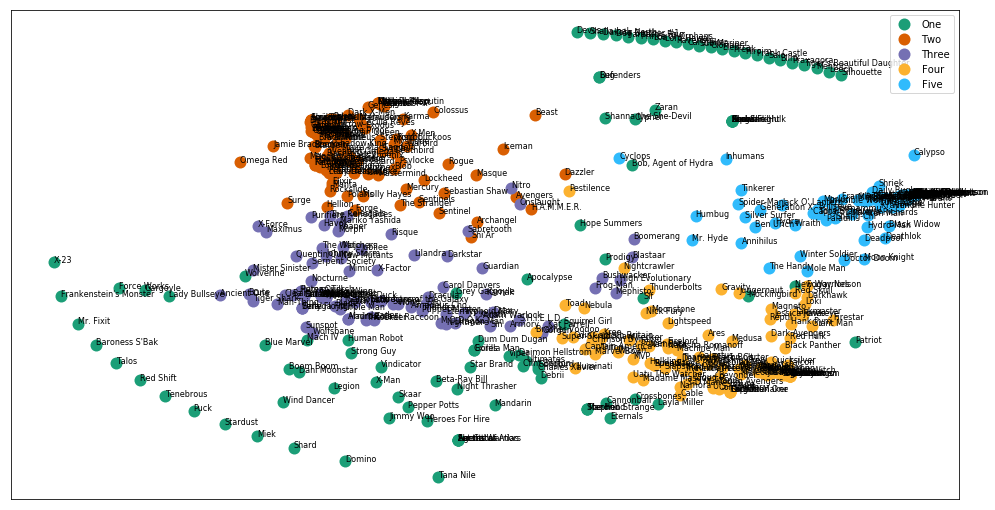

In [354]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=names_list)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [340]:
plt.close()

In [341]:
import mpld3

In [342]:

#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [344]:
#create data frame that has the result of the MDS plus the cluster numbers and heroes
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, heroes=names_list)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.heroes]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)